<a href="https://colab.research.google.com/github/signife/VentureStartUp/blob/main/04_17_Seoul_Bicycle_Sharing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [3]:
df = pd.read_csv('/content/drive/MyDrive/sdata/sdata.csv',encoding = 'cp949')

df.head()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,202307,102,102. 망원역 1번출구 앞,일일권,NaN,20대,166,13506.22,121.1,522132.41,5076
1,202307,102,102. 망원역 1번출구 앞,일일권,NaN,30대,40,2888.06,24.84,107055.57,1407
2,202307,102,102. 망원역 1번출구 앞,일일권,NaN,40대,13,752.19,6.75,29146.67,252
3,202307,102,102. 망원역 1번출구 앞,일일권,NaN,50대,4,261.72,2.05,8850.00,80
4,202307,102,102. 망원역 1번출구 앞,일일권,NaN,~10대,5,461.54,4.02,17341.38,150


In [4]:
df.tail()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
624315,202312,6172,6172. 가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,6172. 가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,6172. 가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,6172. 가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6
624319,202312,6172,6172. 가양5단지아파트,정기권,M,기타,1,46.37,0.43,1858.74,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624320 entries, 0 to 624319
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여년월     624320 non-null  int64  
 1   대여소번호    624320 non-null  int64  
 2   대여소명     624320 non-null  object 
 3   대여구분코드   624320 non-null  object 
 4   성별       419875 non-null  object 
 5   연령대코드    624320 non-null  object 
 6   이용건수     624320 non-null  int64  
 7   운동량      624320 non-null  object 
 8   탄소량      624320 non-null  object 
 9   이용거리(M)  624320 non-null  float64
 10  이용시간(분)  624320 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 52.4+ MB


In [6]:
df.describe()

,대여년월,대여소번호,이용건수,이용거리(M),이용시간(분)
count,624320.000000,624320.000000,624320.000000,6.243200e+05,624320.000000
mean,202309.446492,2305.921692,37.237172,8.668301e+04,765.792409
std,1.677989,1563.674311,71.060002,1.655482e+05,1425.595290
min,202307.000000,102.000000,1.000000,0.000000e+00,0.000000
25%,202308.000000,971.000000,4.000000,8.858710e+03,82.000000
50%,202309.000000,1994.000000,12.000000,3.099245e+04,278.000000
75%,202311.000000,3720.000000,39.000000,9.570575e+04,849.000000
max,202312.000000,6172.000000,2408.000000,1.042924e+07,90614.000000


In [7]:
df_raw = df.copy() #원본 복사

In [8]:
df.isnull()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
624315,False,False,False,False,False,False,False,False,False,False,False
624316,False,False,False,False,False,False,False,False,False,False,False
624317,False,False,False,False,False,False,False,False,False,False,False
624318,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df['성별'] = df['성별'].fillna('E')
df.isnull().sum()

대여년월       0
대여소번호      0
대여소명       0
대여구분코드     0
성별         0
연령대코드      0
이용건수       0
운동량        0
탄소량        0
이용거리(M)    0
이용시간(분)    0
dtype: int64

In [10]:
df['성별'].unique()

array(['E', 'F', 'M', 'm', 'f'], dtype=object)

In [11]:
df['성별'] = df['성별'].str.upper()
df['성별'].unique()

array(['E', 'F', 'M'], dtype=object)

In [12]:
df['성별'].value_counts()

성별
M    221336
E    204445
F    198539
Name: count, dtype: int64

<Axes: ylabel='count'>

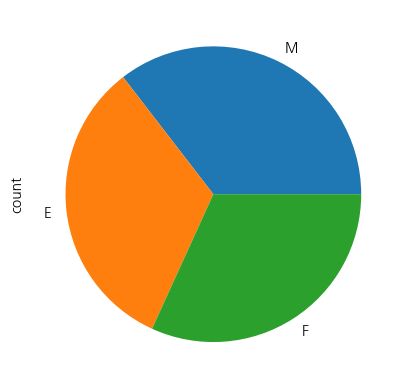

In [13]:
df['성별'].value_counts().plot(kind='pie')

<Axes: xlabel='성별', ylabel='이용시간(분)'>

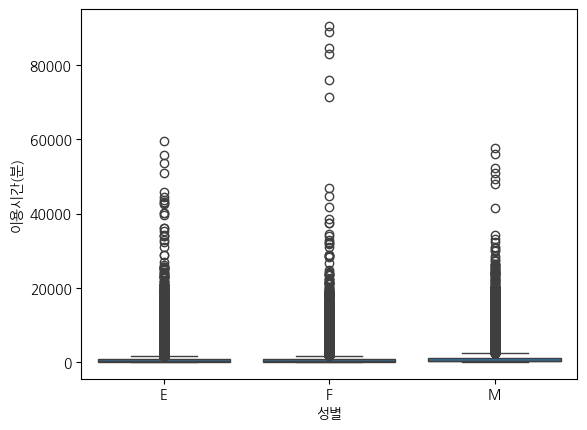

In [14]:
sns.boxplot(x=df['성별'],y=df['이용시간(분)'],data=df)

In [15]:
q1 = df['이용시간(분)'].quantile(0.25)
q3 = df['이용시간(분)'].quantile(0.75)

print(q1,q3)

82.0 849.0


In [16]:
#z score는 정규분포일때, iqr은 정규분포를 따르지 않을떄
iqr = q3 -q1
iqr

767.0

In [17]:
len(df)

624320

In [18]:
outdata = df['이용시간(분)'] > q3+iqr*1.5
outdata = df[outdata].index
df = df.drop(outdata)
len(df)


561700

In [19]:
outdata = df['이용시간(분)'] < q1-iqr*1.5
outdata = df[outdata].index
print(len(outdata))
df = df.drop(outdata)
len(df)

0


561700

In [20]:
df.value_counts('성별')

성별
M    192763
E    186220
F    182717
Name: count, dtype: int64

In [21]:
# @title T검정
df_f =df[df['성별']=='F']
df_f

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
7,202307,102,102. 망원역 1번출구 앞,일일권,F,30대,51,3488.93,35.91,154818.53,1262
8,202307,102,102. 망원역 1번출구 앞,일일권,F,40대,15,1249.1,11.91,51358.94,451
9,202307,102,102. 망원역 1번출구 앞,일일권,F,50대,3,585.57,5.37,23150.29,125
10,202307,102,102. 망원역 1번출구 앞,일일권,F,70대이상,1,140.42,1.37,5910.00,37
11,202307,102,102. 망원역 1번출구 앞,일일권,F,~10대,19,2188.58,21.59,96433.07,921
...,...,...,...,...,...,...,...,...,...,...,...
624299,202312,6171,6171. 월드빌딩 앞,정기권,F,60대,1,84.03,0.97,4160.51,47
624300,202312,6171,6171. 월드빌딩 앞,정기권,F,~10대,13,409.99,4.26,18327.86,112
624301,202312,6171,6171. 월드빌딩 앞,정기권,F,기타,2,126.54,1.4,6067.76,69
624312,202312,6172,6172. 가양5단지아파트,정기권,F,20대,1,46.73,0.57,2458.39,18


In [22]:
df_m =df[df['성별']=='M']
df_m

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
15,202307,102,102. 망원역 1번출구 앞,일일권,M,40대,25,2071.95,18.25,78590.92,670
16,202307,102,102. 망원역 1번출구 앞,일일권,M,50대,10,1054.85,8.76,37804.80,294
17,202307,102,102. 망원역 1번출구 앞,일일권,M,60대,4,342.92,3.12,13423.98,112
18,202307,102,102. 망원역 1번출구 앞,일일권,M,~10대,19,2201.53,19.33,86331.09,890
19,202307,102,102. 망원역 1번출구 앞,일일권,M,기타,16,910.57,8.19,35212.86,269
...,...,...,...,...,...,...,...,...,...,...,...
624315,202312,6172,6172. 가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,6172. 가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,6172. 가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,6172. 가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6


In [23]:
# df_sex_mean = df.groupby('성별').mean()['이용시간(분)']
df_m['이용시간(분)'].mean()


471.7018566841147

In [24]:
df_f['이용시간(분)'].mean()

392.898290799433

In [25]:
stats.ttest_ind(df_m['이용시간(분)'],df_f['이용시간(분)'],equal_var = True)
#pvalue 0.05 이하 > 차이가 있다

TtestResult(statistic=51.154797865590815, pvalue=0.0, df=375478.0)

In [26]:
df.tail()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
624315,202312,6172,6172. 가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,6172. 가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,6172. 가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,6172. 가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6
624319,202312,6172,6172. 가양5단지아파트,정기권,M,기타,1,46.37,0.43,1858.74,9


In [27]:
len(df['대여소명'].unique())

2765

In [28]:
'6172. 가양아파트'.split('.')

['6172', ' 가양아파트']

In [29]:
d_name = df['대여소명']
name_list = []
for temp in d_name:
    if '.' in temp:
        name = temp.split('.')[-1].strip() #6172. 가양아파트 면 가양아파트만 가져오기
        name_list.append(name)
    else:
        name_list.append(temp.strip())

df['대여소명'] = name_list
df.tail()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
624315,202312,6172,가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6
624319,202312,6172,가양5단지아파트,정기권,M,기타,1,46.37,0.43,1858.74,9


In [30]:

# import numpy as np
# # aggfunc에 따라 집계 함수를 설정
# aggfuncs = {col: 'first' if (df[col].dtype == 'object') or (col =='대여소번호') else 'sum' for col in df.columns}

# # pivot_table 생성
# df_d = df.pivot_table(index='대여소명', aggfunc=aggfuncs)
# df_d


df_d = df.pivot_table(df,index='대여소명',aggfunc='sum')
df_d = df_d[['대여소번호','이용거리(M)','이용건수','이용시간(분)']]
df_d

,대여소번호,이용거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,256800,7648747.15,4002,83684
(재)FITI시험연구원,512112,9190032.67,5464,75157
19민주묘지역,341658,10236484.92,3914,94100
19민주묘지역 1번출구,353464,11987737.38,4597,105348
19탑 앞,341220,7421131.66,3140,62642
...,...,...,...,...
희성오피앙,390082,14691951.06,6145,120994
희훈타워빌 앞,812240,10863245.81,5572,96473
힐스테이트에코,571200,11261777.89,7306,101298


In [31]:
da_no = []

for temp in df_d.index:
    da_no.append(df[df['대여소명']==temp]['대여소번호'].iloc[0])

df_d['대여소번호'] = da_no

df_d

,대여소번호,이용거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,1070,7648747.15,4002,83684
(재)FITI시험연구원,2724,9190032.67,5464,75157
19민주묘지역,1539,10236484.92,3914,94100
19민주묘지역 1번출구,1564,11987737.38,4597,105348
19탑 앞,1551,7421131.66,3140,62642
...,...,...,...,...
희성오피앙,1639,14691951.06,6145,120994
희훈타워빌 앞,3905,10863245.81,5572,96473
힐스테이트에코,2720,11261777.89,7306,101298


In [32]:
df_d.to_csv('서울시 대여소별 현황.csv')

In [33]:
df_d.sort_values(by='이용건수',ascending=False)

,대여소번호,이용거리(M),이용건수,이용시간(분)
대여소명,,,,
마곡역1번출구,1151,11138020.00,12750,108560
공항초등학교건너편,1162,13383374.52,12088,117566
서울남부출입국관리소,3758,12446203.84,11950,115344
마곡수명산파크 209동 건너편,1192,13806577.55,11717,124075
마곡 MICE 복합단지,5062,12932641.80,11361,110306
...,...,...,...,...
신내역금강펜테리움센트럴파크,4845,143996.98,71,964
구립수락노인종합복지관,5330,105299.67,64,1166
서울숲 IT캐슬,3538,140491.77,61,1252


In [34]:
df_d.sort_values(by='이용시간(분)',ascending=False)[0:10]

,대여소번호,이용거리(M),이용건수,이용시간(분)
대여소명,,,,
한양수자인아파트 앞,1828,19147905.85,9081,158108
광남중학교,544,21589656.63,5097,155051
화랑대역 7번출구,1450,20152039.88,6677,151702
위례중앙푸르지오 201동 앞,4453,16285162.91,6698,149540
신목동역 3번출구,766,20987919.63,4960,149344
도봉제1교,4077,23352134.87,4055,145366
구파발역 2번출구,905,16102506.55,7627,144310
현대자동차서비스 앞,836,20337608.66,3683,144132
문화촌 공원,123,20864716.00,4616,143779


In [35]:
df.to_csv('서울시 따릉이 전처리.csv')

In [41]:
station_info = pd.read_csv('공공자전거 대여소 정보(23.06월 기준).csv', encoding='cp949')
station_info.tail()


,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
2748,3699.0,상일파출소 옆,강동구,강동구 상일동 520-1,37.55655289,127.1658783,2022-06-21,NaN,15,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2749,3700.0,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.54816437,127.1225739,2022-07-08,NaN,8,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2750,3701.0,방아삼거리,강동구,강동구 둔촌동 118-2,37.5232811,127.1461334,2022-10-12,NaN,8,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2751,4951.0,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.1351624,2022-09-29,NaN,5,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2752,4952.0,천호시장 버스정류소 옆,강동구,강동구 천호동 397-465,37.54146576,127.1302567,2023-01-18,NaN,5,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
station_info = station_info.iloc[0:,0:6]
station_info

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,자치구,상세주소,위도,경도
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.9714508
...,...,...,...,...,...,...
2748,3699.0,상일파출소 옆,강동구,강동구 상일동 520-1,37.55655289,127.1658783
2749,3700.0,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.54816437,127.1225739
2750,3701.0,방아삼거리,강동구,강동구 둔촌동 118-2,37.5232811,127.1461334
2751,4951.0,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.1351624


In [43]:
station_info = station_info.iloc[4:,0:6]
station_info.columns = ['대여소번호','대여소명','소재지','주소','위도','경도']
station_info.head()

,대여소번호,대여소명,소재지,주소,위도,경도
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.9714508
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.57594681,126.9740601
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.57176971,126.9746628
7,305.0,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.57255936,126.9783325
8,307.0,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.56999969,126.9710999


In [44]:
station_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 4 to 2752
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2749 non-null   float64
 1   대여소명    2749 non-null   object 
 2   소재지     2749 non-null   object 
 3   주소      2749 non-null   object 
 4   위도      2749 non-null   object 
 5   경도      2749 non-null   object 
dtypes: float64(1), object(5)
memory usage: 129.0+ KB


In [54]:
station_info['대여소번호'] = station_info['대여소번호'].astype('int')
station_info['위도'] = station_info['위도'].astype('float')
station_info['경도'] = station_info['경도'].astype('float')
station_info.info()
station_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 4 to 2752
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2749 non-null   int64  
 1   대여소명    2749 non-null   object 
 2   소재지     2749 non-null   object 
 3   주소      2749 non-null   object 
 4   위도      2749 non-null   float64
 5   경도      2749 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 129.0+ KB


,대여소번호,위도,경도
count,2749.000000,2749.000000,2749.000000
mean,2313.912332,37.547113,126.991448
std,1542.937782,0.052226,0.092810
min,102.000000,37.430977,126.798599
25%,996.000000,37.505016,126.914803
50%,2048.000000,37.545284,127.002838
75%,3707.000000,37.577202,127.063797
max,6054.000000,37.691013,127.180756


In [46]:
station_info.isnull().sum()

대여소번호    0
대여소명     0
소재지      0
주소       0
위도       0
경도       0
dtype: int64

In [51]:
d= station_info[station_info['대여소번호']==316]
d['위도'].values[0]

'37.57039642'

In [56]:
lat = []
lng = []
#latitude longitude


for temp in df_d['대여소번호']: #대여소정보
    #print(temp)
    try:
        d= station_info[station_info['대여소번호']==temp]
        lat.append(d['위도'].values[0])
        lng.append(d['경도'].values[0])
    except:
        lat.append(39.1)
        lng.append(128.1)

In [57]:
df_d['위도'] = lat
df_d['경도'] = lng
df_d

,대여소번호,이용거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
(시립)고덕평생학습관,1070,7648747.15,4002,83684,37.555702,127.157921
(재)FITI시험연구원,2724,9190032.67,5464,75157,37.568485,126.838570
19민주묘지역,1539,10236484.92,3914,94100,37.649673,127.013451
19민주묘지역 1번출구,1564,11987737.38,4597,105348,37.649597,127.013847
19탑 앞,1551,7421131.66,3140,62642,37.646862,127.008812
...,...,...,...,...,...,...
희성오피앙,1639,14691951.06,6145,120994,37.680313,127.055069
희훈타워빌 앞,3905,10863245.81,5572,96473,37.501915,126.889244
힐스테이트에코,2720,11261777.89,7306,101298,37.559658,126.829605


In [83]:
# @title 이용건수가 많으면 이용시간도 많을까? 상관관계 분석 직접 해보기
import numpy as np

correlation_matrix = np.corrcoef(df_d['이용건수'], df_d['이용시간(분)'])
correlation = correlation_matrix[0, 1]

print(f"이용건수와 이용시간의 상관계수: {correlation:.2f}")


이용건수와 이용시간의 상관계수: 0.82


In [69]:
# @title 이용건수
df_top_use = df_d.sort_values(by = '이용건수', ascending=False)[0:10]
df_top_use

,대여소번호,이용거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
마곡역1번출구,1151,11138020.00,12750,108560,37.560207,126.824142
공항초등학교건너편,1162,13383374.52,12088,117566,37.562679,126.820473
서울남부출입국관리소,3758,12446203.84,11950,115344,37.560593,126.820847
마곡수명산파크 209동 건너편,1192,13806577.55,11717,124075,37.555450,126.826897
마곡 MICE 복합단지,5062,12932641.80,11361,110306,37.563541,126.824554
마곡수명산 1-2단지,2732,13146278.97,10944,118156,37.555309,126.829857
강서세무서 앞,2744,11615140.34,10914,104086,37.562092,126.820969
마곡수명산파크1단지,2718,12878318.95,10666,120179,37.555191,126.831467
마곡엠밸리10단지 앞,1168,13214454.91,10292,114383,37.560291,126.818756


In [70]:
import folium

map = folium.Map(location=[37.566183,126.978442],zoom_start = 12)

for temp in range(len(df_top_use)):
    d_temp = df_top_use.iloc[temp]
    folium.Marker(location = [d_temp['위도'],d_temp['경도']],icon = folium.Icon(color = 'red')
    ,popup=d_temp.name).add_to(map)

map

In [71]:
df_ma_top = df[df['대여소명']=='마곡역1번출구']
df_ma_top

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
31394,202307,1151,마곡역1번출구,일일권,E,20대,33,707.61,6.62,30016.46,262
31395,202307,1151,마곡역1번출구,일일권,E,30대,20,386.66,3.26,14187.20,181
31396,202307,1151,마곡역1번출구,일일권,E,40대,5,110.28,0.92,3958.74,37
31397,202307,1151,마곡역1번출구,일일권,E,50대,4,59.02,0.61,2650.42,23
31398,202307,1151,마곡역1번출구,일일권,E,60대,1,29.62,0.26,1100.00,8
...,...,...,...,...,...,...,...,...,...,...,...
559022,202312,1151,마곡역1번출구,정기권,M,50대,229,5812.77,48,207768.70,1591
559023,202312,1151,마곡역1번출구,정기권,M,60대,84,2280.03,20.12,87765.84,767
559024,202312,1151,마곡역1번출구,정기권,M,70대이상,1,28.93,0.26,1123.80,7
559025,202312,1151,마곡역1번출구,정기권,M,~10대,128,2527.77,23.26,100096.48,883


In [72]:
df_ma_top['연령대코드'].unique()

array(['20대', '30대', '40대', '50대', '60대', '~10대', '기타', '70대이상'],
      dtype=object)

In [77]:
df_ma_mean = pd.pivot_table(df_ma_top,index='연령대코드',values =['이용시간(분)','이용건수'],aggfunc='mean') #sum대신
df_ma_mean.sort_values('이용건수',ascending=False)

,이용건수,이용시간(분)
연령대코드,,
20대,95.703704,737.481481
30대,80.555556,656.000000
40대,69.714286,552.321429
50대,64.750000,621.321429
기타,47.190476,423.380952
~10대,46.742857,393.857143
60대,20.230769,224.500000
70대이상,5.125000,41.875000


In [81]:
# @title 이용시간
df_top_time = df_d.sort_values(by = '이용시간(분)', ascending=False)[0:20]
df_top_time

,대여소번호,이용거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
한양수자인아파트 앞,1828,19147905.85,9081,158108,37.475319,126.898888
광남중학교,544,21589656.63,5097,155051,37.540730,127.102905
화랑대역 7번출구,1450,20152039.88,6677,151702,37.619637,127.085045
위례중앙푸르지오 201동 앞,4453,16285162.91,6698,149540,37.474346,127.143265
신목동역 3번출구,766,20987919.63,4960,149344,37.543949,126.883461
도봉제1교,4077,23352134.87,4055,145366,37.679848,127.050385
구파발역 2번출구,905,16102506.55,7627,144310,37.636234,126.918999
현대자동차서비스 앞,836,20337608.66,3683,144132,37.531422,126.951500
문화촌 공원,123,20864716.00,4616,143779,37.594330,126.947388


In [82]:
import folium

map = folium.Map(location=[37.566183,126.978442],zoom_start = 12)

for temp in range(len(df_top_time)):
    d_temp = df_top_time.iloc[temp]
    folium.Marker(location = [d_temp['위도'],d_temp['경도']],icon = folium.Icon(color = 'red')
    ,popup=d_temp.name).add_to(map)

map